In [22]:
#importing modules 
import numpy as np 
import pandas as pd 
import tensorflow as tf
import tensorflow_hub as hub
import cv2
import imghdr
import os
from keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras import datasets, layers, models
from keras.models import Model
from keras.layers import Dense,Flatten
from keras.applications.inception_v3 import InceptionV3,preprocess_input
from tensorflow.keras.regularizers import l2
from tensorflow.keras.optimizers import Adam
from sklearn.metrics import make_scorer, accuracy_score
from sklearn.model_selection import GridSearchCV
from keras.wrappers.scikit_learn import KerasClassifier
import keras
from tensorflow.keras.callbacks import EarlyStopping
#nception v3 is an image recognition model that has been shown to attain greater than
#78.1% accuracy on the ImageNet dataset. The model is the culmination of
#many ideas developed by multiple researchers over the years.
base_model=InceptionV3(input_shape=(256,256,3),include_top=False, weights='imagenet')
for layer in base_model.layers:
    layer.trainable=False
#flatten layers converts a 2d array of image into a 1d array
x=base_model.output
x=layers.Flatten()(x)
x=Dense(units=5,activation='sigmoid')(x)
model=Model(base_model.input,x)
model.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=0.0001),loss=keras.losses.binary_crossentropy,metrics=['accuracy'])

In [6]:
model_mobilenet_v2 = tf.keras.Sequential([
    layers.Conv2D(16,(2,2), activation="relu", padding='same',input_shape=[256, 256, 3]),
    layers.MaxPool2D(),
    layers.Dropout(rate=0.10),
    layers.Conv2D(32,(2,2), activation="relu", padding='same'),
    layers.MaxPool2D(),
    layers.Dropout(rate=0.10),
    layers.Conv2D(64,(2,2), activation="relu", padding='same'),
    layers.MaxPool2D(),
    layers.Dropout(rate=0.10),
    layers.Conv2D(128,(2,2), activation="relu", padding='same'),
    layers.MaxPool2D(),
    layers.Dropout(rate=0.10),
    layers.Conv2D(256,(2,2), activation="relu", padding='same'),
    layers.MaxPool2D(),
    layers.Dropout(rate=0.10),
    layers.Conv2D(512,(2,2), activation="relu", padding='same'),
    layers.Flatten(),
    layers.Dense(5, activation="sigmoid", name="output_layer")                             
])
model_mobilenet_v2.compile(loss="categorical_crossentropy", optimizer=tf.keras.optimizers.Adam(), metrics=["accuracy"])

In [31]:
train_datagen=ImageDataGenerator(featurewise_center=True, validation_split=0.06,rotation_range=0.05,width_shift_range=0.05,horizontal_flip=True,preprocessing_function=preprocess_input,zoom_range=0.1,shear_range=0.1)
train_data=train_datagen.flow_from_directory(directory="/kaggle/input/anyas-gojo-revival-aerospace-enigma/train",target_size=(256,256),batch_size=50,subset = 'training')
validation_data=train_datagen.flow_from_directory(directory="/kaggle/input/anyas-gojo-revival-aerospace-enigma/train",target_size=(256,256),batch_size=50,subset = 'validation')

Found 2203 images belonging to 5 classes.
Found 138 images belonging to 5 classes.


In [8]:
from tensorflow.keras.applications import EfficientNetB7
base_model1= incep(input_shape=(600,600,3),weights='imagenet', include_top=False)
for layer in base_model1.layers:
    layer.trainable=False
#flatten layers converts a 2d array of image into a 1d array
x=base_model1.output
x=layers.Flatten()(x)
x=Dense(units=5,activation='sigmoid')(x)
model1=Model(base_model1.input,x)
model1.compile(optimizer='adam',loss=keras.losses.binary_crossentropy,metrics=['accuracy'])

In [32]:
early_stopping = EarlyStopping(monitor='val_loss', patience=7, verbose=1, restore_best_weights=True)

In [33]:
from PIL import ImageFile
ImageFile.LOAD_TRUNCATED_IMAGES = True
# his=model.fit_generator(train_data,steps_per_epoch=20,epochs=20)
history=model.fit(train_data,steps_per_epoch=30,epochs=30,callbacks=[early_stopping],validation_data = validation_data,validation_steps = 1)

Epoch 1/30
30/30 [==============================] - 29s 948ms/step - loss: 0.1159 - accuracy: 0.9007 - val_loss: 0.1922 - val_accuracy: 0.7800
Epoch 2/30
30/30 [==============================] - 27s 895ms/step - loss: 0.1108 - accuracy: 0.9213 - val_loss: 0.2376 - val_accuracy: 0.7400
Epoch 3/30
30/30 [==============================] - 26s 858ms/step - loss: 0.1018 - accuracy: 0.9326 - val_loss: 0.1811 - val_accuracy: 0.8600
Epoch 4/30
30/30 [==============================] - 26s 873ms/step - loss: 0.0970 - accuracy: 0.9327 - val_loss: 0.2181 - val_accuracy: 0.8000
Epoch 5/30
30/30 [==============================] - 27s 886ms/step - loss: 0.0870 - accuracy: 0.9500 - val_loss: 0.1930 - val_accuracy: 0.7800
Epoch 6/30
30/30 [==============================] - 27s 917ms/step - loss: 0.0895 - accuracy: 0.9408 - val_loss: 0.1836 - val_accuracy: 0.8400
Epoch 7/30
30/30 [==============================] - 27s 902ms/step - loss: 0.0890 - accuracy: 0.9387 - val_loss: 0.2301 - val_accuracy: 0.7200

In [34]:
print(history.history)

{'loss': [0.11593121290206909, 0.11083708703517914, 0.10183834284543991, 0.09704256057739258, 0.0870426744222641, 0.08949962258338928, 0.08897317945957184, 0.07963790744543076, 0.0810789242386818, 0.08071485906839371, 0.07501093298196793, 0.07015345245599747, 0.0621727854013443, 0.06218138337135315, 0.05573786050081253], 'accuracy': [0.9006666541099548, 0.9213333129882812, 0.9325533509254456, 0.9326666593551636, 0.949999988079071, 0.9408121109008789, 0.9387474060058594, 0.9545767307281494, 0.942188560962677, 0.9545767307281494, 0.9525120258331299, 0.956641435623169, 0.9649001955986023, 0.972470760345459, 0.9752236604690552], 'val_loss': [0.19223438203334808, 0.2376231700181961, 0.18110018968582153, 0.2180955857038498, 0.19297057390213013, 0.1835549771785736, 0.2300850749015808, 0.11042376607656479, 0.20324374735355377, 0.21526846289634705, 0.24105076491832733, 0.2026412934064865, 0.15764504671096802, 0.1536145657300949, 0.15292495489120483], 'val_accuracy': [0.7799999713897705, 0.74000

In [ ]:
train_data.class_indices

In [35]:
from tensorflow.keras.preprocessing.image import load_img,img_to_array
#importing the test folder
test_path='/kaggle/input/anyas-gojo-revival-aerospace-enigma/test'
result={}
indices_dict={train_data.class_indices[i]:i for i in train_data.class_indices.keys()}
for img_path in os.listdir(test_path):
    path =os.path.join(test_path,img_path)
    #keeping image size (256,256) so that it can be compatible with the model
    img=load_img(path,target_size=(256,256))
    #converts image to numeric data
    i=img_to_array(img)
    i=preprocess_input(i)
    pres=np.argmax(model.predict(np.array([i])))
    result.update({img_path:indices_dict[pres]})
# print(result)

1/1 [==============================] - 0s 25ms/step


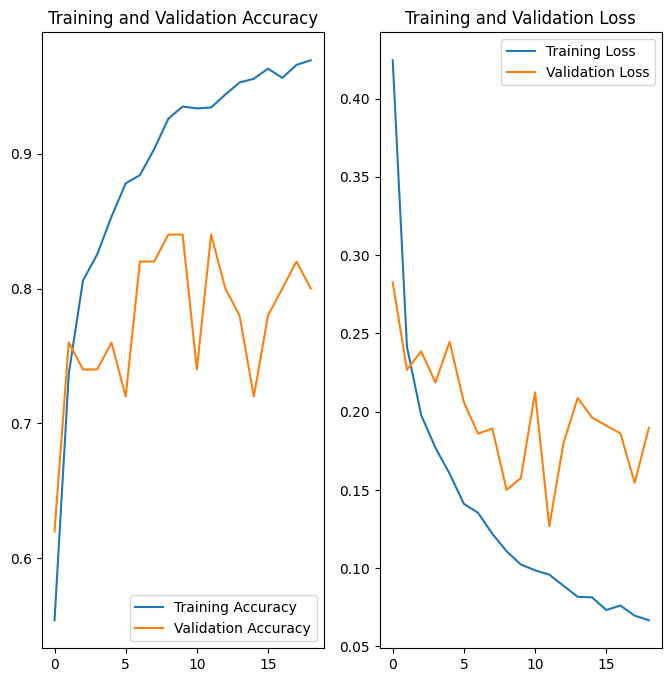

In [17]:
import matplotlib.pyplot as plt
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']

loss = history.history['loss']
val_loss = history.history['val_loss']

#This code is used to plot the training and validation accuracy
epochs_range = range(len(loss))

plt.figure(figsize=(8, 8))
plt.subplot(1, 2, 1)
plt.plot(epochs_range, acc, label='Training Accuracy')
plt.plot(epochs_range, val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')

plt.subplot(1, 2, 2)
plt.plot(epochs_range, loss, label='Training Loss')
plt.plot(epochs_range, val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')
plt.show()

In [ ]:
print(result)

In [36]:
import pandas as pd
submission=pd.DataFrame({'image_path':result.keys(),"Class":result.values()})
submission.to_csv("submission2.csv", index=False)